## Индивидуальное задание

8. Соседями элемента Aij в матрице назовем элементы Akl с i − 1 ≤ k ≤ i + 1, j - 1 ≤ l ≤ j + 1, (k, l)≠(i, j). Операция сглаживания матрицы дает новую матрицу того же размера, каждый элемент которой получается как среднее арифметическое имеющихся
соседей соответствующего элемента исходной матрицы. Построить результат сглаживания
заданной вещественной матрицы размером 7 на 7. В сглаженной матрице найти сумму
модулей элементов, расположенных ниже главной диагонали.

1. Создадим исходную матрицу 7*7 и нулевую матрицу для результата сглаживания

In [382]:
# подключение модуля numpy под именем np
import numpy as np
main_matrix = np.random.randint(0,5,(7,7))
print("Сгенерированная матрица: ")
print(main_matrix)

task_matrix = np.zeros((7,7))

Сгенерированная матрица: 
[[4 3 0 0 2 4 1]
 [1 4 4 2 1 1 2]
 [1 4 1 0 3 4 4]
 [4 4 1 2 0 1 4]
 [4 3 3 0 2 4 2]
 [1 2 3 3 1 0 3]
 [0 4 3 0 1 0 3]]


2. Для прохождения массива будем использовать numpy.ndenumerate. Для поиска соседей используются срезы матрицы. Для правильной работы нахождения среднего соседей, необходимо с помощью конструкций if ввести проверку на первые строку и столбец (если этого не делать, срез возвращает неправильный результат, так как выходит за границу основного массива). Затем с помощью функции sum суммируем элементы новой матрицы(среза), вычтем value(так как оно не относятся к соседям, а является главным элементом) и поделим на число элементов массива(среза) - 1(исключая главный элемент). Таким образом, найдя все средние арифметические значения, построим сглаженную матрицу.

In [381]:
for (i,j), value in np.ndenumerate(main_matrix):
    # Берем "срез соседей" матрицы, текущий элемент будет исключен при расчетах
    # Нужна проверка на крайние нулевые столбец и строку для правильного среза
    if i == 0 and j ==0:
        m = main_matrix[0:i+2, 0:j+2]
        mean = (np.sum(m)-value)/(m.size - 1)

    elif i == 0:
        m = main_matrix[0:i+2, j-1:j+2]
        mean = (np.sum(m)-value)/(m.size - 1)

    elif j == 0:
        m = main_matrix[i-1:i+2, 0:j+2]
        mean = (np.sum(m)-value)/(m.size - 1)

    else:
        m = main_matrix[i-1:i+2, j-1:j+2]
        mean = (np.sum(m)-value)/(m.size - 1)
    task_matrix[i,j] = round(mean,2)

print("Сглаженная матрица: ")
print(task_matrix)


Сглаженная матрица: 
[[2.33 2.   1.6  1.8  1.6  1.6  1.33]
 [1.4  1.75 1.25 1.38 1.5  1.25 1.6 ]
 [2.   1.88 2.38 2.25 2.38 1.75 1.2 ]
 [1.8  2.   2.25 2.12 2.   1.88 1.6 ]
 [3.   2.88 2.38 2.38 2.88 2.25 2.8 ]
 [3.4  2.75 2.62 2.12 2.5  2.   2.2 ]
 [3.67 2.8  2.4  2.   2.2  2.8  2.  ]]


3. С помощью функции np.tril вернем копию массива с обнуленными элементами ниже главной диагонали и найдем их сумму.

In [378]:
task_matrix_null = np.tril(task_matrix, -1)
sum_elements = np.sum(task_matrix_null)
print("Сглаженная матрица с обнуленными значениями выше главной диагонали: ")
print(task_matrix_null)
print("Сумма элементов: ", sum_elements)

Сглаженная матрица с обнуленными значениями выше главной диагонали: 
[[0.   0.   0.   0.   0.   0.   0.  ]
 [1.4  0.   0.   0.   0.   0.   0.  ]
 [2.   1.88 0.   0.   0.   0.   0.  ]
 [1.8  2.   2.25 0.   0.   0.   0.  ]
 [3.   2.88 2.38 2.38 0.   0.   0.  ]
 [3.4  2.75 2.62 2.12 2.5  0.   0.  ]
 [3.67 2.8  2.4  2.   2.2  2.8  0.  ]]
Сумма элементов:  51.23


## Проработка примеров

### Доступ к частям многомерного массива

In [239]:
import numpy as np
# Теперь создадим матрицу, с которой будем работать.
m = np.matrix('1 2 3 4; 5 6 7 8; 9 1 5 7')
print(m)

[[1 2 3 4]
 [5 6 7 8]
 [9 1 5 7]]


In [240]:
m[1, 0]

5

In [241]:
m[1, :]

matrix([[5, 6, 7, 8]])

In [242]:
m[:, 2]

matrix([[3],
        [7],
        [5]])

In [243]:
m[1, 2:]

matrix([[7, 8]])

In [244]:
m[0:2, 1]

matrix([[2],
        [6]])

In [245]:
cols = [0, 1, 3]
m[:, cols]

matrix([[1, 2, 4],
        [5, 6, 8],
        [9, 1, 7]])

### Расчет статистик по данным в массиве

In [246]:
# Для начала создадим матрицу, которая нам понадобится в работе.
m = np.matrix('1 2 3 4; 5 6 7 8; 9 1 5 7')
print(m)

[[1 2 3 4]
 [5 6 7 8]
 [9 1 5 7]]


In [247]:
type(m)

numpy.matrix

In [248]:
# Matix можно превратить в ndarray следующим образом:
m = np.array(m)
type(m)

numpy.ndarray

In [249]:
#Для определения размерности массива Numpy используйте атрибут shape.
m.shape

(3, 4)

In [250]:
m[0:2, 1:3]

array([[2, 3],
       [6, 7]])

Для расчета той или иной статистики, соответствующую функцию можно вызвать как метод объекта, с которым вы работаете. 

Функции (методы) для расчета статистик в Numpy:
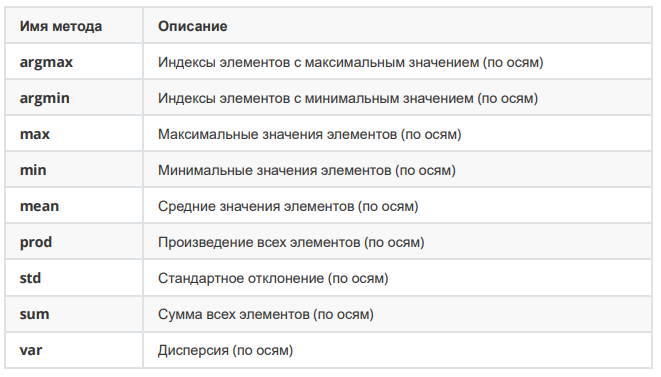

In [251]:
 m.max()

9

In [252]:
 np.max(m)

9

In [253]:
 m.max()

9

In [254]:
 m.max(axis=1)

array([4, 8, 9])

In [255]:
 m.max(axis=0)

array([9, 6, 7, 8])

In [256]:
m.mean()

4.833333333333333

In [257]:
 m.mean(axis=1)

array([2.5, 6.5, 5.5])

In [258]:
m.sum()

58

In [259]:
m.sum(axis=0)

array([15,  9, 15, 19])

### Использование boolean массива для доступа к ndarray

In [260]:
nums = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
letters = np.array(['a', 'b', 'c', 'd', 'a', 'e', 'b'])

In [261]:
b = 5 > 7
print(b)

False


In [262]:
# В этом примере мы создали boolean массив, в котором на месте 
# элементов из nums, которые меньше пяти стоит True, 
# в остальных случаях – False.
less_then_5 = nums < 5
less_then_5

array([ True,  True,  True,  True, False, False, False, False, False,
       False])

In [263]:
# Построим массив, в котором значение True будут иметь элементы, 
# чей индекс совпадает с индексами, на которых стоит символ ‘a’ 
# в массиве letters.
pos_a = letters == 'a'
pos_a

array([ True, False, False, False,  True, False, False])

In [264]:
# Самым замечательным в использовании boolean массивов при работе 
# с ndarray является то, что их можно применять для построения выборок.
less_then_5 = nums < 5
less_then_5
nums[less_then_5]

array([1, 2, 3, 4])

In [265]:
m = np.matrix('1 2 3 4; 5 6 7 8; 9 1 5 7')
print(m)

[[1 2 3 4]
 [5 6 7 8]
 [9 1 5 7]]


In [266]:
mod_m = np.logical_and(m>=3, m<=7)
mod_m

matrix([[False, False,  True,  True],
        [ True,  True,  True, False],
        [False, False,  True,  True]])

In [267]:
m[mod_m]

matrix([[3, 4, 5, 6, 7, 5, 7]])

In [268]:
nums = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
nums[nums < 5]

array([1, 2, 3, 4])

In [269]:
nums[nums < 5] = 10
print(nums)

[10 10 10 10  5  6  7  8  9 10]


In [270]:
m[m > 7] = 25
print(m)

[[ 1  2  3  4]
 [ 5  6  7 25]
 [25  1  5  7]]


### Дополнительные функции

In [271]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [272]:
np.arange(5, 12)

array([ 5,  6,  7,  8,  9, 10, 11])

In [273]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [274]:
a = [[1, 2], [3, 4]]
np.matrix(a)

matrix([[1, 2],
        [3, 4]])

In [275]:
b = np.array([[5, 6], [7, 8]])
np.matrix(b)


matrix([[5, 6],
        [7, 8]])

In [276]:
np.matrix('[1, 2; 3, 4]')

matrix([[1, 2],
        [3, 4]])

In [277]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [278]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [279]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [280]:
# Функция np.ravel() используется для того, чтобы преобразовать 
# матрицу в одномерный вектор.
np.ravel(A)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [281]:
# ‘C’, что означает – массив будет собираться из строк исходной матрицы.
np.ravel(A, order='C')

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [282]:
# Если указать order=‘F‘,
# то в качестве элементов для сборки будут выступать столбцы матрицы.
np.ravel(A, order='F')

array([1, 4, 7, 2, 5, 8, 3, 6, 9])

In [283]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np.where(a % 2 == 0, a * 10, a / 10)

array([ 0. ,  0.1, 20. ,  0.3, 40. ,  0.5, 60. ,  0.7, 80. ,  0.9])

In [284]:
a = np.random.rand(10)
a

array([0.88036102, 0.58655767, 0.64546116, 0.52337534, 0.25759443,
       0.82525385, 0.40154891, 0.23465085, 0.27954979, 0.83511349])

In [285]:
np.where(a > 0.5, True, False)

array([ True,  True,  True,  True, False,  True, False, False, False,
        True])

In [286]:
np.where(a > 0.5, 1, -1)

array([ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1])

np.meshgrid()

Функция meshgrid() позволят получить матрицу координат из координатных векторов. Если,
например, у нас есть два одномерных вектора координат, то передав их в качестве аргументов в
meshgrid() мы получим две матрицы, в которой элементы будут составлять пары, заполняя все
пространство, определяемое этими векторами. Проще посмотреть это на примере.

In [287]:
x = np.linspace(0, 1, 5)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [288]:
y = np.linspace(0, 2, 5)
y

array([0. , 0.5, 1. , 1.5, 2. ])

In [289]:
xg, yg = np.meshgrid(x, y)
xg

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [290]:
yg

array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ],
       [1.5, 1.5, 1.5, 1.5, 1.5],
       [2. , 2. , 2. , 2. , 2. ]])

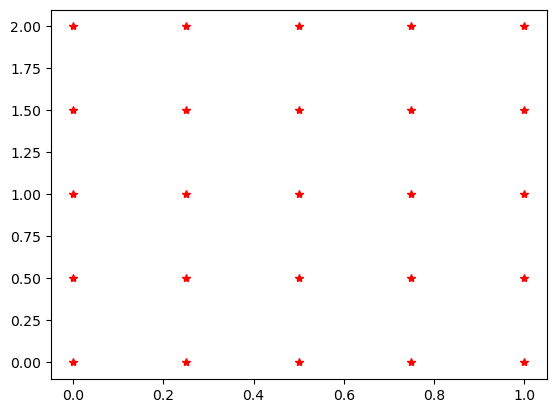

In [291]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xg, yg, color="r", marker="*", linestyle="none")

In [292]:
np.random.permutation(7)

array([6, 2, 4, 3, 5, 1, 0])

In [293]:
a = ['a', 'b', 'c', 'd', 'e']
np.random.permutation(a)

array(['b', 'c', 'e', 'd', 'a'], dtype='<U1')

In [294]:
arr = np.linspace(0, 10, 5)
arr

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [295]:
arr_mix = np.random.permutation(arr)
arr_mix

array([ 0. ,  5. ,  2.5, 10. ,  7.5])

In [296]:
index_mix = np.random.permutation(len(arr_mix))
index_mix

array([0, 1, 4, 2, 3])

In [297]:
arr[index_mix]

array([ 0. ,  2.5, 10. ,  5. ,  7.5])